In [46]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


# The normal equation 

In [57]:
X = 2  *  np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #added gaussian noise in the last time as y = 4+3x+gaussian noise

In [58]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best


array([[3.88388119],
       [3.11349609]])

In [59]:
#prediction new values
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.88388119],
       [10.11087336]])

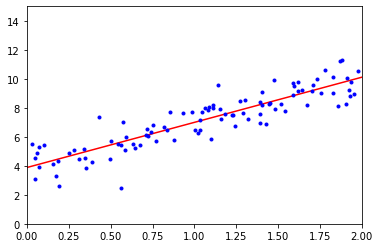

In [60]:
#Plotting the line

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Using scikit

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_







(array([3.88388119]), array([[3.11349609]]))

In [62]:
lin_reg.predict(X_new)

array([[ 3.88388119],
       [10.11087336]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [63]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.88388119],
       [3.11349609]])

This function computes X^+ y
, where 
 is the pseudoinverse of  (specifically the Moore-Penrose inverse). We can use np.linalg.pinv() to compute the pseudoinverse directly:



In [64]:
np.linalg.pinv(X_b).dot(y)

array([[3.88388119],
       [3.11349609]])

In [65]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [66]:
theta

array([[3.88388119],
       [3.11349609]])

In [67]:
X_new_b.dot(theta)

array([[ 3.88388119],
       [10.11087336]])

In [72]:
#Making function
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    

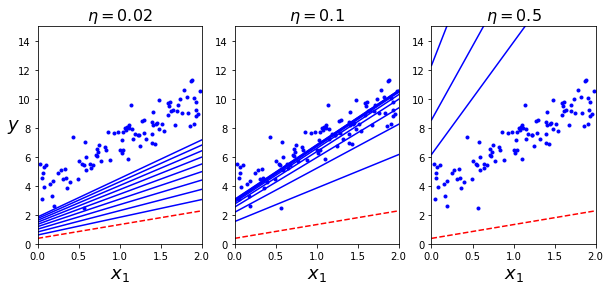

In [74]:
np.random.seed(42)
theta = np.random.rand(2,1)


plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

